In [ ]:
import numpy as np  # Import the NumPy  as 'np'
import pandas as pd  # Import the pandas  as 'pd' for convenience.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#load dataset

df=pd.read_excel('ML_LAB.xlsx')

df #To print data



,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
# Save the DataFrame to a CSV file
output_filename = "student_purchase_behavior.csv"
df.to_csv(output_filename, index=False)  # Set index=False to exclude the index column

In [ ]:
'''A1. For the data table provided below, calculate the entropy associated with each attribute / feature
at the root node. Using this information, identify the first feature that you’d select for constructing
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label.
'''
import math

# Calculate entropy for 'buys_computer'
def entropy(data):
    entropy = 0
    total_count = len(data)
    unique_classes = dataframe['buys_computer'].unique()

    for c in unique_classes:
        p = (dataframe['buys_computer'] == c).sum() / total_count
        entropy -= p * math.log2(p)

    return entropy

entropy_root = entropy(dataframe)

# Calculate Information Gain for each feature
def information_gain(data, feature):
    unique_values = dataframe[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)

    return entropy_root - weighted_entropy

# Calculate Information Gain for each feature
features = ['age', 'income', 'student', 'credit_rating']
information_gains = {feature: information_gain(dataframe, feature) for feature in features}

# Find the feature with the highest Information Gain
root_feature = max(information_gains, key=information_gains.get)

print("Information Gains:")
print(information_gains)
print("The first feature for the decision tree is:", root_feature)


Information Gains:
{'age': 2.897636659056826, 'income': 2.956530348110394, 'student': 1.0597140413293693, 'credit_rating': 1.0894613847234211}
The first feature for the decision tree is: income


In [ ]:
'''A2. Create a Decision Tree for the above data. Get the
 depth of the constructed tree.'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X_data = df.drop('buys_computer', axis=1)
y_data = df['buys_computer']

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X_data)

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the training set accuracy
training_accuracy = model.score(X_train, y_train)
print("Training Set Accuracy:", training_accuracy)

# Get the depth of the constructed tree
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 4


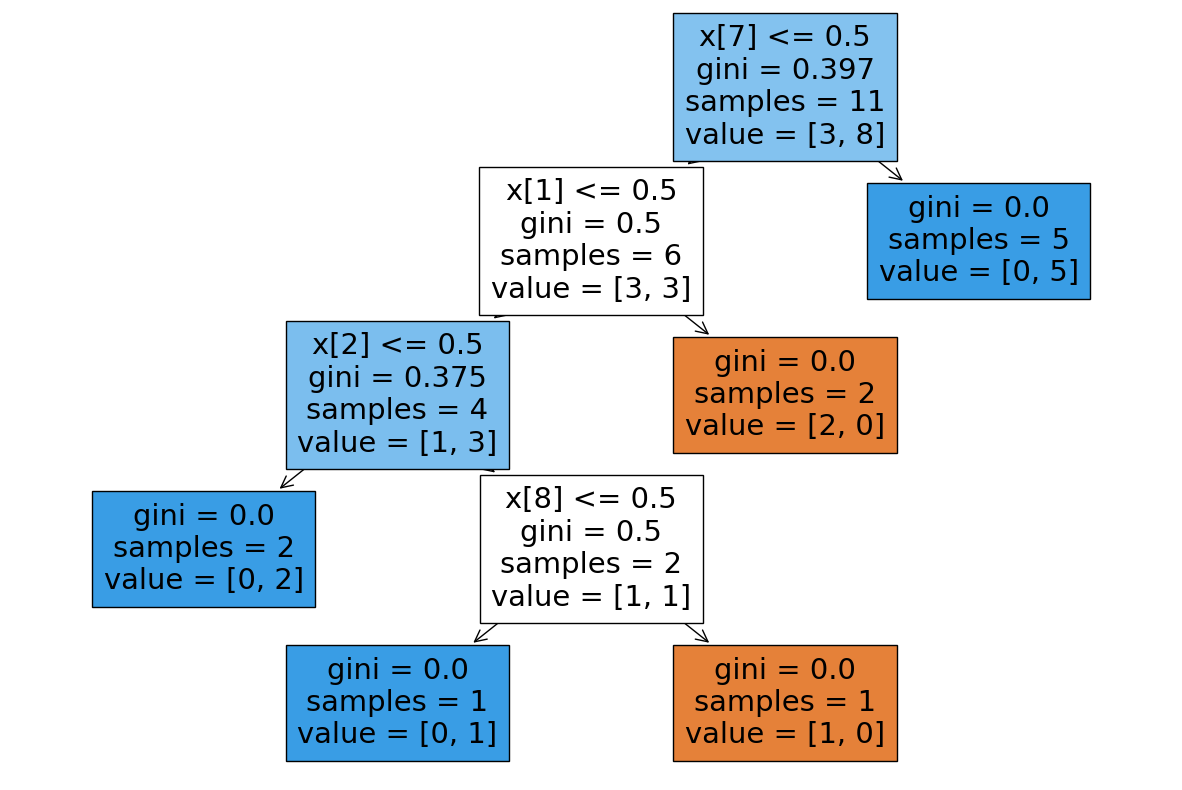

In [ ]:
'''A3. Visualize the constructed tree with plot_tree() command.
Following code snippet for help.
'''

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # Make sure you have already split and prepared your data

plt.figure(figsize=(15, 10))  # Adjust the figsize as needed
plot_tree(model, filled=True)
plt.show()



In [ ]:
data = pd.read_csv('parkin.csv')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Training Set Accuracy: 1.0
Test Set Accuracy: 0.9230769230769231


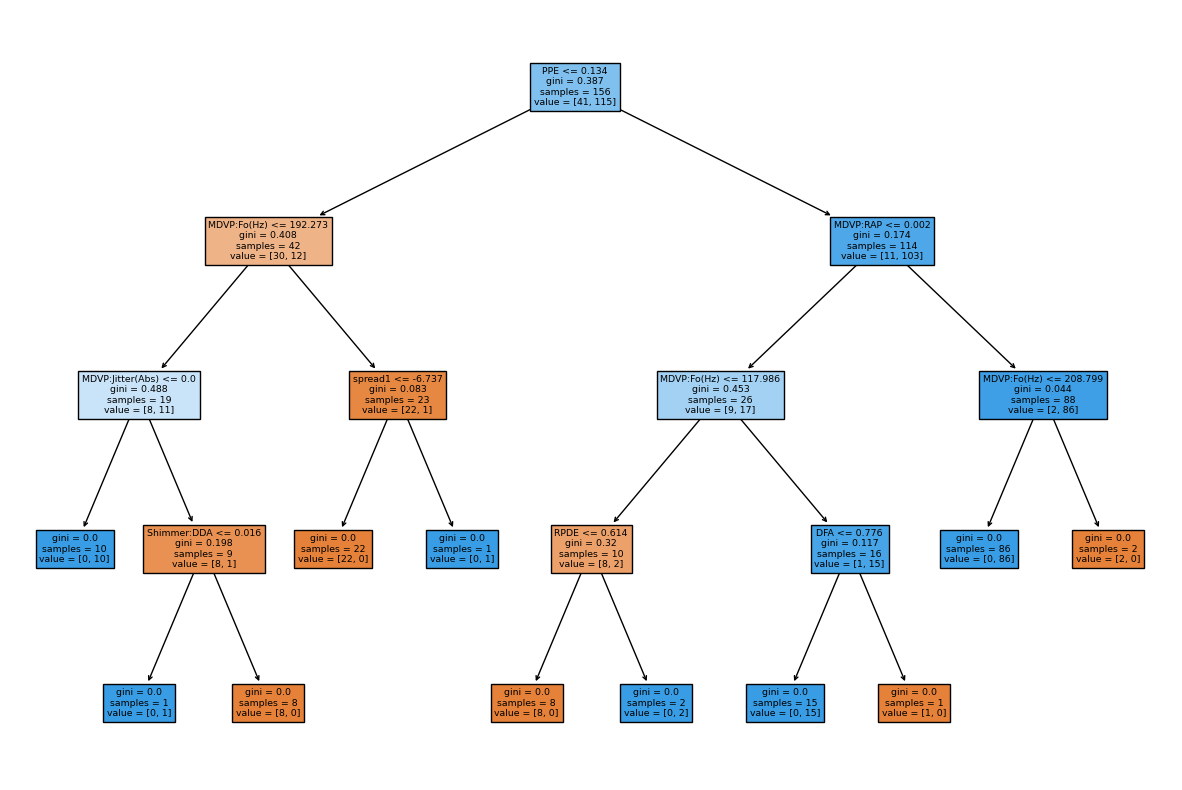

In [ ]:
'''A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code
for help.'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data.drop(columns=['status','name'])
y = data['status']

# Splitting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)

test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)

# Decision Tree Plot
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()




Training Set Accuracy (max_depth=5): 100.00%
Test Set Accuracy (max_depth=5): 92.31%


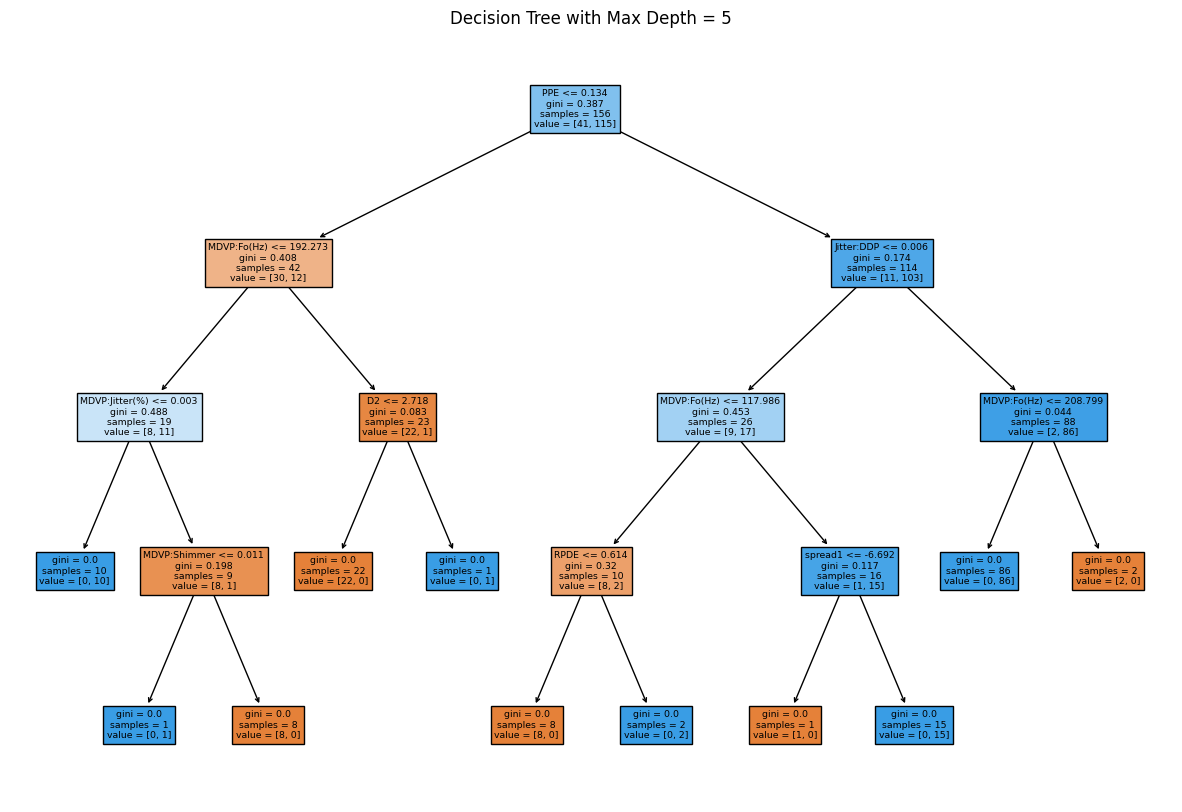

In [ ]:
'''A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the
accuracies. Visualize the tree constructed with max_depth constraint'''
# Separate features (X) and target (y)


# Splitting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model with max_depth constraint
max_depth = 5
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy (max_depth=" + str(max_depth) + "): " + "{:.2f}%".format(training_accuracy * 100))

test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy (max_depth=" + str(max_depth) + "): " + "{:.2f}%".format(test_accuracy * 100))

# Decision Tree with max_depth constraint Plot
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.title("Decision Tree with Max Depth = {}".format(max_depth))
plt.show()


efgtg Training Set Accuracy (Entropy Criterion): 100.00%
efgtg Test Set Accuracy (Entropy Criterion): 100.00%


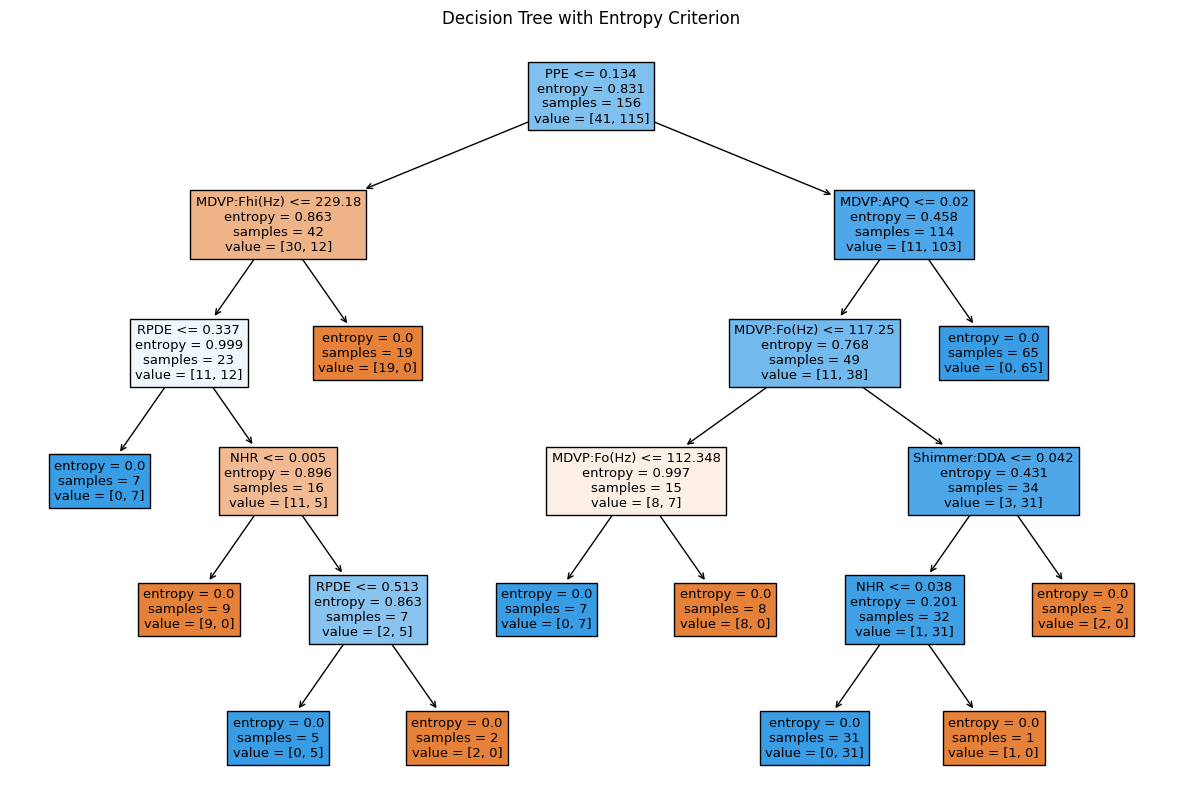

In [ ]:
'''A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study
the model & graph. Find the differences between the default criterion and entropy criterion. Refer
code below for criterion'''
# Fitting the Decision Tree model with "entropy" criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy for entropy criterion
training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
print("efgtg Training Set Accuracy (Entropy Criterion): {:.2f}%".format(training_accuracy_entropy * 100))
test_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
# Calculating and printing test set accuracy with the entropy criterion
print("efgtg Test Set Accuracy (Entropy Criterion): {:.2f}%".format(test_accuracy_entropy * 100))



# Decision Tree with entropy Plot
plt.figure(figsize=(15, 10))
plot_tree(model_entropy, filled=True, feature_names=X.columns)
plt.title("Decision Tree with Entropy Criterion")
plt.show()


In [ ]:
'''A7. Construct a random forest classifier on your project data. Find the differences between the
decision tree & random forest classifiers with the help of the performance metrics. '''
# Fitting a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(Tr_X, Tr_y)

# Making predictions on the test set using the Decision Tree classifier
decision_tree_predictions = decision_tree_classifier.predict(Te_X)

# Calculating accuracy and other performance metrics for the Decision Tree
decision_tree_accuracy = accuracy_score(Te_y, decision_tree_predictions)
decision_tree_report = classification_report(Te_y, decision_tree_predictions, output_dict=True)

print("Decision Tree Classifier Performance:")
print("Accuracy:", decision_tree_accuracy)
print("Classification Report:")
print("Precision:", decision_tree_report['1']['precision'])
print("Recall:", decision_tree_report['1']['recall'])
print("F1 Score:", decision_tree_report['1']['f1-score'])

# Fitting a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(Tr_X, Tr_y)

# Making predictions on the test set using the Random Forest classifier
random_forest_predictions = random_forest_classifier.predict(Te_X)

# Calculating accuracy and other performance metrics for the Random Forest
random_forest_accuracy = accuracy_score(Te_y, random_forest_predictions)
random_forest_report = classification_report(Te_y, random_forest_predictions, output_dict=True)

print("\nRandom Forest Classifier Performance:")
print("Accuracy:", random_forest_accuracy)
print("Classification Report:")
print("Precision:", random_forest_report['1']['precision'])
print("Recall:", random_forest_report['1']['recall'])
print("F1 Score:", random_forest_report['1']['f1-score'])




Decision Tree Classifier Performance:
Accuracy: 0.9230769230769231
Classification Report:
Precision: 0.9393939393939394
Recall: 0.96875
F1 Score: 0.9538461538461539

Random Forest Classifier Performance:
Accuracy: 0.9487179487179487
Classification Report:
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697
